In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
batch_size = 128
num_classes = 10
epochs = 5

In [8]:
x_train.shape

(60000, 28, 28)

In [32]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [9]:
def plot_digit_and_label(image, label):
    print(label)
    plt.imshow(image, cmap='gray')

5


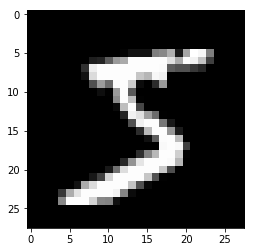

In [10]:
plot_digit_and_label(x_train[0], y_train[0])

In [11]:
def index_to_image_and_label(data_train, data_label, index):
    plot_digit_and_label(data_train[index], data_label[index])

8


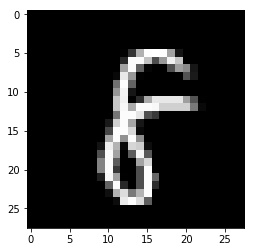

In [12]:
index_to_image_and_label(x_train, y_train, 456)

In [13]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train

In [16]:
model = Sequential()

In [17]:
model.add(Dense(600, activation='relu', input_shape=(784,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               471000    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 776,510
Trainable params: 776,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
model.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
9s - loss: 12.9513 - acc: 0.1961 - val_loss: 11.9754 - val_acc: 0.2566
Epoch 2/5
8s - loss: 11.4916 - acc: 0.2868 - val_loss: 10.4269 - val_acc: 0.3527
Epoch 3/5
9s - loss: 10.4452 - acc: 0.3518 - val_loss: 10.0481 - val_acc: 0.3763
Epoch 4/5
8s - loss: 10.2157 - acc: 0.3660 - val_loss: 10.1589 - val_acc: 0.3696
Epoch 5/5
9s - loss: 10.2819 - acc: 0.3619 - val_loss: 10.0340 - val_acc: 0.3772


In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [22]:
x_train /= 255
x_test /= 255

In [23]:
y_hat = model.predict_classes(x_test)

 9824/10000 [============================>.] - ETA: 0s

In [24]:
y_hat

array([7, 2, 2, ..., 7, 6, 6])

In [25]:
(_, _),(_, test_labels) = mnist.load_data()

In [26]:
import pandas as pd

In [27]:
pd.crosstab(y_hat, test_labels)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,798,0,4,82,0,224,1,0,78,3
2,30,524,929,572,6,155,11,29,337,9
6,143,134,57,33,168,162,939,5,117,23
7,9,477,42,323,808,351,7,994,442,974


In [28]:
test_wrong = [im for im in zip(x_test, y_hat, test_labels) if im[1] != im[2]]
len(test_wrong)

6340

ValueError: num must be 1 <= num <= 256, not 257

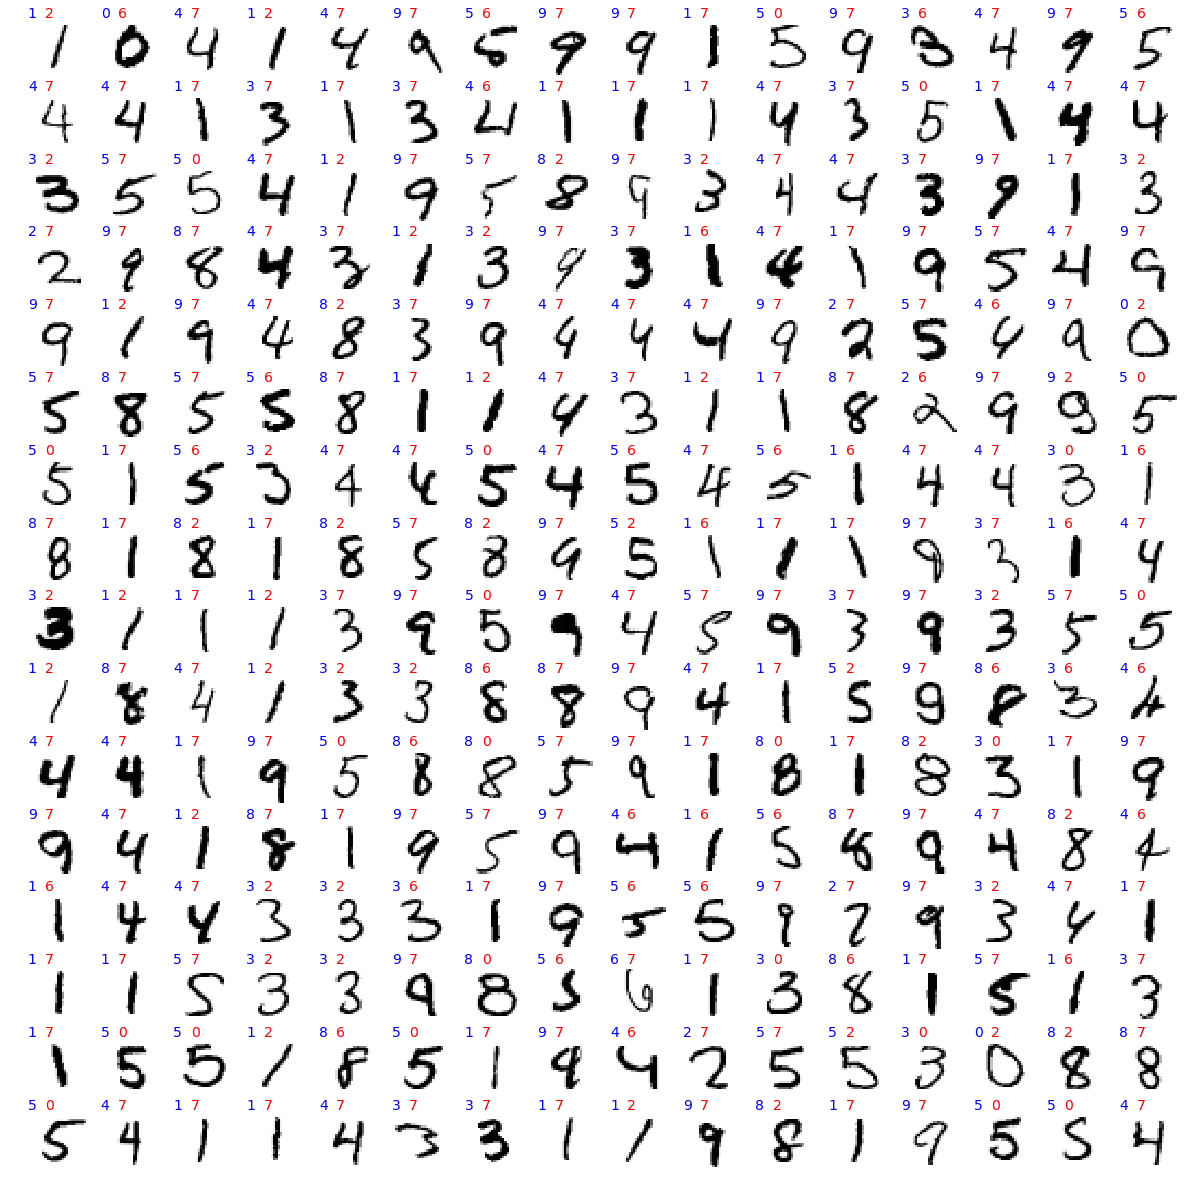

In [29]:
plt.figure(figsize=(16,16))

for index, digit in enumerate(test_wrong):
    plt.subplots_adjust(left=0, right=1, top=1, bottom =0)
    plt.subplot(16,16, index+1)
    plt.imshow(1-digit[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    plt.text(0,0, digit[2], fontsize=14, color='blue')
    plt.text(8,0,digit[1], fontsize=14, color='red')
    